# HW Assignment #2: Fibbonacci Sequence

## Part 1

### The Fibbonnaci sequence using memorization method is

In [164]:
import numpy as np
import time
import matplotlib.pyplot as plt
from numpy import loadtxt

In [165]:
n = 20
table = [None]*(n+1)
def fib3(n, table):
    if n == 0 or n==1:
        table[n]=n
    if table[n] is None:
        table[n] = fib3(n-1, table) + fib3(n-2,table)
    return table[n]

### Now to plot the ratio F(n)/F(n-1) with respect to n

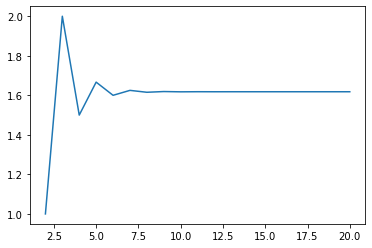

In [166]:
fib3(n,table)

dataratio = []
for i in range(2,n+1):
    ratio = table[i]/table[i-1]
    dataratio = np.append(dataratio,ratio)
plt.plot(np.arange(2,n+1),dataratio)
plt.show()



## Part 2

### Recursion Method

In [167]:
def fib2(n):
    if n == 0: return 0
    elif n == 1: return 1
    else: return fib2(n-1)+fib2(n-2)

### Tabulation Method

In [168]:
def fib4(n):
    table=[0]*(n+1)
    table[1] = 1
    for i in range(2,n+1):
        table[i]= table[i-1] + table[i-2]
        
    return table[n]

### Matrix Method

In [169]:
def arrpow(arr, n):
    yarr=arr
    if n<1:
        print('n needs to be larger than 1')
        return n
    if n==1:
        return arr
    yarr = arrpow(arr, n//2)
    yarr = [[yarr[0][0]*yarr[0][0]+yarr[0][1]*yarr[1][0],yarr[0][0]*yarr[0][1]+yarr[0][1]*yarr[1][1]],
            [yarr[1][0]*yarr[0][0]+yarr[1][1]*yarr[1][0],yarr[1][0]*yarr[0][1]+yarr[1][1]*yarr[1][1]]]
    if n%2:
        yarr=[[yarr[0][0]*arr[0][0]+yarr[0][1]*arr[1][0],yarr[0][0]*arr[0][1]+yarr[0][1]*arr[1][1]],
            [yarr[1][0]*arr[0][0]+yarr[1][1]*arr[1][0],yarr[1][0]*arr[0][1]+yarr[1][1]*arr[1][1]]]
    return yarr

def fib5(n):
    arr= [[1,1],[1,0]]
    f=arrpow(arr,n-1)[0][0]
    return f

## a & b)
### The following code handles the time calculations for the Matrix method, Recursion method and the Tabulation method at different values of n and outputs time and n into a file. The way I went about doing this and taking parts of the code from Lecture 3 in order to get the time, but in order to write it to a file I used the writelines() function. In order to write the data to a file, I needed to store the value of n and the time to a variable. Once they were stored, I created a new variable which was the time and value of n as a string. I wasn't able to pass time and n into writelines without them being a string. I created three separate files: data1, data2, and data3

#### Time and n for recursion

In [170]:
n2=np.arange(0,40,2)
time2=np.zeros(n2.size)
file3 = open("data3.txt", "w")
#f = open("data.txt", "a")
for i in range(n2.size):
    start_time = time.time()
    temp=fib2(n2[i])
    time2[i] = time.time()-start_time
    m = n2[i]
    n = time2[i]
    p = str(m)
    q = str(n)
    r = [p + ' ' + q + "\n"]
    file3.writelines(r)
file3.close()

#### Time and n for Tabulation method

In [171]:
n3=np.arange(22100,80001,100)
time3=np.zeros(n3.size)
file1 = open("data1.txt", "w")
for i in range(n3.size):
    table = [None]*(22100+i*100)
    start_time = time.time()
    temp=fib4(n3[i])
    time3[i] = time.time()-start_time
    f = n3[i]
    g = time3[i]
    h = str(f)
    j = str(g)
    k = [h + ' ' + j + "\n"]
    file1.writelines(k)
file1.close()

#### Time and n for Matrix  Method

In [172]:
#this is for the matrix method. it seems that for small numbers the time is really sporatic and jumps from zero to some value
#so i tried big numbers in order to see at what value the values increase without going to zero
n4=np.arange(34000,100001,100)
time4=np.zeros(n4.size)
file2 = open("data2.txt", "w")
for i in range(n4.size):
    #the range for the table needed to be changed because this does not time well for low numbers since its fast
    table = [None]*(34000+i*100)
    start_time = time.time()
    temp=(fib5(n4[i]))
    time4[i] = time.time()-start_time
    a = n4[i]
    b = time4[i]
    c = str(a)
    d = str(b)
    e = [c + ' ' + d + "\n"]
    file2.writelines(e)
file2.close()

## c)
### This section of code will handle reading the data from the file and plotting log(time) vs log(n).

#### Log(time) vs log(n) (Recursion Method)

C:\Users\MARKIE~1\AppData\Local\Temp/ipykernel_24288/3924376796.py:9: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(x), np.log10(y))


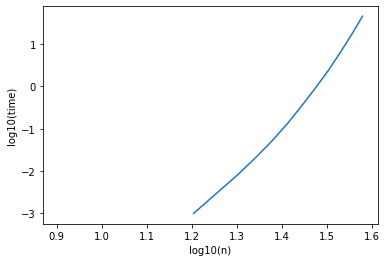

In [173]:
a = loadtxt("data3.txt", float)
x = []
y = []
for i in range(len(a)):
    temp2 = a[i][0]
    temp3 = a[i][1]
    x.append(temp2)
    y.append(temp3)
plt.plot(np.log10(x), np.log10(y))
plt.xlabel('log10(n)')
plt.ylabel('log10(time)')
plt.show()

#### time vs n (Recursion method)

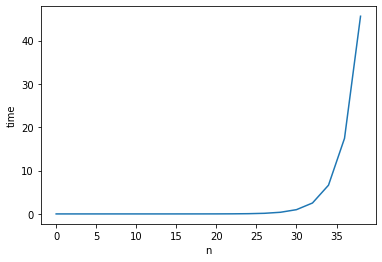

In [176]:
a = loadtxt("data3.txt", float)
x = []
y = []
for i in range(len(a)):
    temp2 = a[i][0]
    temp3 = a[i][1]
    x.append(temp2)
    y.append(temp3)
plt.plot(x, y)
plt.xlabel('n')
plt.ylabel('time')
plt.show()

#### Log(time) vs log(n) (Tabulation Method)

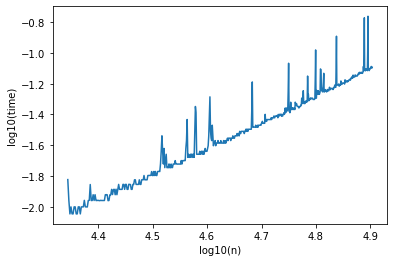

In [174]:
b = loadtxt("data1.txt", float)
x = []
y = []
for i in range(len(b)):
    temp2 = b[i][0]
    temp3 = b[i][1]
    x.append(temp2)
    y.append(temp3)
plt.plot(np.log10(x), np.log10(y))
plt.xlabel('log10(n)')
plt.ylabel('log10(time)')
plt.show()
    

#### time vs n (Tabulation method)

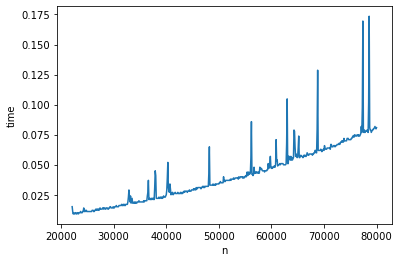

In [177]:
b = loadtxt("data1.txt", float)
x = []
y = []
for i in range(len(b)):
    temp2 = b[i][0]
    temp3 = b[i][1]
    x.append(temp2)
    y.append(temp3)
plt.plot(x, y)
plt.xlabel('n')
plt.ylabel('time')
plt.show()

#### Log(time) vs log(n) (Matrix Method)

C:\Users\MARKIE~1\AppData\Local\Temp/ipykernel_24288/3339305077.py:9: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(x), np.log10(y))


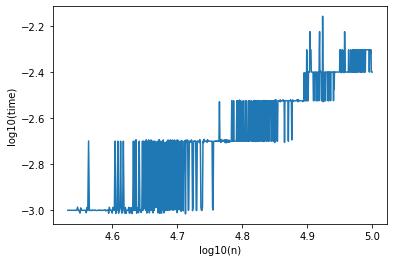

In [175]:
c = loadtxt("data2.txt", float)
x = []
y = []
for i in range(len(c)):
    temp2 = c[i][0]
    temp3 = c[i][1]
    x.append(temp2)
    y.append(temp3)
plt.plot(np.log10(x), np.log10(y))
plt.xlabel('log10(n)')
plt.ylabel('log10(time)')
plt.show()

#### time vs n (Matrix method)

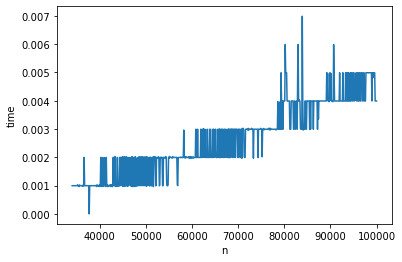

In [178]:
c = loadtxt("data2.txt", float)
x = []
y = []
for i in range(len(c)):
    temp2 = c[i][0]
    temp3 = c[i][1]
    x.append(temp2)
    y.append(temp3)
plt.plot(x, y)
plt.xlabel('n')
plt.ylabel('time')
plt.show()

### Complexity

##### Recursion time Complexity

The time complexity of the  recursive methods looks to follow $O(N^2)$. The time vs n graph shows to be the right hand side of a parabola, while the log10(time) vs log10(n) appears to not be so much as linear, but it is maybe part of a parabola. This is what leads me to my conclusion regarding its time complexity

##### Tabulation Time Complexity

The graphs for the tabulation method features outliers, but when ignored, the time vs n and the log10(time) vs log10(n) graph but showcase linear plots. This leads me to conclude that its time complexity follows $O(N)$.

##### Matrix Time Complexity

I dont really know what to make of the time complexity for the matrix method. But it looks like for every value, its constant. Which means that it follows a time complexity $O(1)$. There are quite a few outliers which makes the graph hard to interpret. But for the most part it looks to follow a constant trend